In [1]:
# Dependencies
import pandas as pd
from pathlib import Path
from dateutil import parser
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt

import sklearn as skl

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf

from sklearn.decomposition import PCA

In [2]:
# Store filepath in a variable
file_one = Path("Resources/Property Sales Data/2013_to_2023_property-sales-data.csv")

In [3]:
# Read our data file with the Pandas library
# Not every CSV requires an encoding, but be aware this can come up
original_df = pd.read_csv(file_one, encoding="ISO-8859-1")

C:\Users\Kunwar\AppData\Local\Temp\ipykernel_9208\2974018042.py:3: DtypeWarning: Columns (12,17,19) have mixed types. Specify dtype option on import or set low_memory=False.
  original_df = pd.read_csv(file_one, encoding="ISO-8859-1")


In [4]:
# Show the first five rows.
original_df.head()

,ï»¿PropertyID,PropType,taxkey,Address,CondoProject,District,nbhd,Style,Extwall,Stories,Year_Built,Rooms,FinishedSqft,Units,Bdrms,Fbath,Hbath,Lotsize,Sale_date,Sale_price
0,98459.0,Commercial,30091000,9220 N 107TH ST,NaN,9.0,6202.0,Office Building - 1 Story,Concrete Block,1.0,1981.0,NaN,12960,5,NaN,0.0,0.0,54885,2023-08-15,530000
1,98477.0,Residential,39995000,9574 N 107TH ST,NaN,9.0,40.0,Cape Cod,Aluminum/Vinyl,1.0,1942.0,7.0,1182,1,4.0,1.0,1.0,33541,2023-12-15,160000
2,98500.0,Residential,40071000,9531 N MICHAEL CT,NaN,9.0,40.0,Ranch,Fiber Cement/Hardiplank,1.0,2006.0,9.0,1880,1,3.0,2.0,0.0,10607,2023-08-31,387500
3,98566.0,Residential,50047000,9350 N JOYCE AV,NaN,9.0,40.0,Ranch,Aluminum/Vinyl,1.0,1980.0,6.0,1489,1,3.0,3.0,0.0,8640,2023-08-25,335000
4,98598.0,Residential,50079000,9355 N BURBANK AV,NaN,9.0,40.0,Ranch,Aluminum/Vinyl,1.0,1986.0,5.0,1209,1,3.0,1.0,1.0,7200,2023-06-20,250000


In [5]:
#getting only 'Residential' values
residential_df = original_df.loc[original_df["PropType"] == 'Residential']
residential_df.head()

,ï»¿PropertyID,PropType,taxkey,Address,CondoProject,District,nbhd,Style,Extwall,Stories,Year_Built,Rooms,FinishedSqft,Units,Bdrms,Fbath,Hbath,Lotsize,Sale_date,Sale_price
1,98477.0,Residential,39995000,9574 N 107TH ST,NaN,9.0,40.0,Cape Cod,Aluminum/Vinyl,1.0,1942.0,7.0,1182,1,4.0,1.0,1.0,33541,2023-12-15,160000
2,98500.0,Residential,40071000,9531 N MICHAEL CT,NaN,9.0,40.0,Ranch,Fiber Cement/Hardiplank,1.0,2006.0,9.0,1880,1,3.0,2.0,0.0,10607,2023-08-31,387500
3,98566.0,Residential,50047000,9350 N JOYCE AV,NaN,9.0,40.0,Ranch,Aluminum/Vinyl,1.0,1980.0,6.0,1489,1,3.0,3.0,0.0,8640,2023-08-25,335000
4,98598.0,Residential,50079000,9355 N BURBANK AV,NaN,9.0,40.0,Ranch,Aluminum/Vinyl,1.0,1986.0,5.0,1209,1,3.0,1.0,1.0,7200,2023-06-20,250000
5,98624.0,Residential,50105000,8210 W GLENBROOK RD,NaN,9.0,40.0,Colonial,Aluminum/Vinyl,2.0,1989.0,6.0,1663,1,3.0,2.0,1.0,7200,2023-01-10,270000


In [6]:
#delete unwanted columns
residential_df.drop(['CondoProject', 'ï»¿PropertyID','PropType','District','Extwall','nbhd','Stories','taxkey','Address','Rooms','Year_Built','Units'], axis=1, inplace=True)

C:\Users\Kunwar\AppData\Local\Temp\ipykernel_9208\2778458971.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  residential_df.drop(['CondoProject', 'ï»¿PropertyID','PropType','District','Extwall','nbhd','Stories','taxkey','Address','Rooms','Year_Built','Units'], axis=1, inplace=True)


In [7]:
residential_df.head()

,Style,FinishedSqft,Bdrms,Fbath,Hbath,Lotsize,Sale_date,Sale_price
1,Cape Cod,1182,4.0,1.0,1.0,33541,2023-12-15,160000
2,Ranch,1880,3.0,2.0,0.0,10607,2023-08-31,387500
3,Ranch,1489,3.0,3.0,0.0,8640,2023-08-25,335000
4,Ranch,1209,3.0,1.0,1.0,7200,2023-06-20,250000
5,Colonial,1663,3.0,2.0,1.0,7200,2023-01-10,270000


In [8]:
residential_df.shape

(43742, 8)

In [9]:
#check datatype of each column
residential_df.dtypes

Style            object
FinishedSqft     object
Bdrms           float64
Fbath           float64
Hbath           float64
Lotsize          object
Sale_date        object
Sale_price       object
dtype: object

In [10]:
# 'Sale_date' column:change the datatype format
def custom_date_parser(date_string):
    try:
        # Attempt to parse the date using dateutil.parser
        parsed_date = parser.parse(date_string, default=datetime(1, 1, 1))
        if parsed_date.year == 1:
            raise ValueError("Incomplete date, handled separately")
        return parsed_date
    except (parser.ParserError, ValueError):
        # Handle specific incomplete date cases manually
        if '-' in date_string:
            try:
                # Attempt to parse dates like "Jul-18" as month and year
                date = datetime.strptime(date_string, "%b-%y")
                return date.replace(day=1)  # Set the day to the first day of the month
            except ValueError:
                try:
                    # Attempt to parse dates like "07-18" as month and year
                    date = datetime.strptime(date_string, "%m-%y")
                    return date.replace(day=1)  # Set the day to the first day of the month
                except ValueError:
                    pass
        # Return pd.NaT if the date cannot be parsed
        return pd.NaT

# Sample data with mixed date formats
date_strings = residential_df['Sale_date']

# Apply the custom date parser to each date string
parsed_dates = [custom_date_parser(date) for date in date_strings]

# Convert to pandas Series for better handling and display
parsed_dates_series = pd.Series(parsed_dates)
print(parsed_dates_series)


0       2023-12-15
1       2023-08-31
2       2023-08-25
3       2023-06-20
4       2023-01-10
           ...    
43737   2013-12-01
43738   2013-12-01
43739   2013-12-01
43740   2013-12-01
43741   2013-12-01
Length: 43742, dtype: datetime64[ns]


In [11]:
residential_df['Sale_date']=parsed_dates_series
#residential_df = residential_df.dropna(subset=['Sale_date'])
#residential_df['Sale_date'] = residential_df['Sale_date'].apply(lambda x: x.timestamp())
residential_df.head()

C:\Users\Kunwar\AppData\Local\Temp\ipykernel_9208\3720104543.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  residential_df['Sale_date']=parsed_dates_series


,Style,FinishedSqft,Bdrms,Fbath,Hbath,Lotsize,Sale_date,Sale_price
1,Cape Cod,1182,4.0,1.0,1.0,33541,2023-08-31,160000
2,Ranch,1880,3.0,2.0,0.0,10607,2023-08-25,387500
3,Ranch,1489,3.0,3.0,0.0,8640,2023-06-20,335000
4,Ranch,1209,3.0,1.0,1.0,7200,2023-01-10,250000
5,Colonial,1663,3.0,2.0,1.0,7200,2023-12-27,270000


In [12]:
# replace '$' sign from some Sale_price values
residential_df=residential_df.dropna(subset=['Sale_price'])


residential_df['Sale_price'] = residential_df['Sale_price'].astype(str)

residential_df['Sale_price'] = residential_df['Sale_price'].str.replace('$', '')
residential_df['Sale_price'] = residential_df['Sale_price'].str.replace(',', '')
residential_df['Sale_price'] = pd.to_numeric(residential_df['Sale_price']).astype(int)
residential_df.head()

,Style,FinishedSqft,Bdrms,Fbath,Hbath,Lotsize,Sale_date,Sale_price
1,Cape Cod,1182,4.0,1.0,1.0,33541,2023-08-31,160000
2,Ranch,1880,3.0,2.0,0.0,10607,2023-08-25,387500
3,Ranch,1489,3.0,3.0,0.0,8640,2023-06-20,335000
4,Ranch,1209,3.0,1.0,1.0,7200,2023-01-10,250000
5,Colonial,1663,3.0,2.0,1.0,7200,2023-12-27,270000


In [15]:
residential_df=residential_df.dropna(subset=['Bdrms','Fbath','Hbath','Lotsize'])

residential_df['Bdrms'] = pd.to_numeric(residential_df['Bdrms']).astype(int)
residential_df['Fbath'] = pd.to_numeric(residential_df['Fbath']).astype(int)
residential_df['Hbath'] = pd.to_numeric(residential_df['Hbath']).astype(int)
residential_df['Lotsize'] = residential_df['Lotsize'].str.replace(',', '')
residential_df['Lotsize'] = pd.to_numeric(residential_df['Lotsize']).astype(int)

In [16]:
residential_df.shape

(22652, 8)

In [17]:
residential_df.dtypes

Style                   object
FinishedSqft            object
Bdrms                    int32
Fbath                    int32
Hbath                    int32
Lotsize                  int32
Sale_date       datetime64[ns]
Sale_price               int32
dtype: object

In [19]:
residential_df.to_csv("newcsv.csv", encoding='utf-8',index=False)

In [20]:
#try to find outliers

residential_df.describe()[['Sale_price']]

,Sale_price
count,2.265200e+04
mean,1.870929e+05
min,0.000000e+00
25%,1.230000e+05
50%,1.750000e+05
75%,2.320000e+05
max,2.500000e+06
std,1.081663e+05


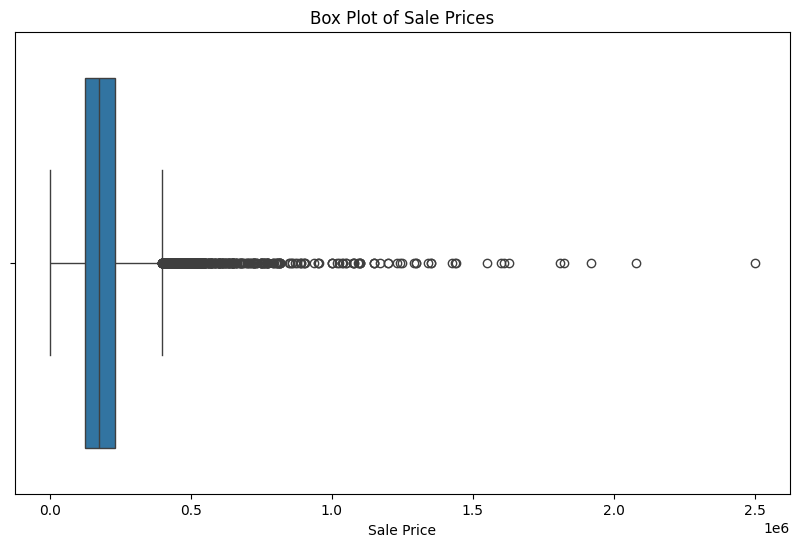

In [21]:
# Create the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x=residential_df['Sale_price'])
plt.title('Box Plot of Sale Prices')
plt.xlabel('Sale Price')
plt.show()

In [23]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = residential_df['Sale_price'].quantile(0.25)
Q3 = residential_df['Sale_price'].quantile(0.75)

# Calculate the IQR (Interquartile Range)
IQR = Q3 - Q1

# Calculate the lower and upper bound
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
df_no_outliers = residential_df[(residential_df['Sale_price'] >= lower_bound) & (residential_df['Sale_price'] <= upper_bound)]


# Display the DataFrame without outliers
df_no_outliers.shape

(21987, 8)

In [24]:
# Convert categorical data to numeric with `pd.get_dummies`
dummies = pd.get_dummies(residential_df)
dummies.head()

,Bdrms,Fbath,Hbath,Lotsize,Sale_date,Sale_price,Style_Bi-Level,Style_Cape Cod,Style_Colonial,Style_Contemporary,...,FinishedSqft_990,FinishedSqft_991,FinishedSqft_992,FinishedSqft_993,FinishedSqft_994,FinishedSqft_995,FinishedSqft_996,FinishedSqft_997,FinishedSqft_998,FinishedSqft_999
1,4,1,1,33541,2023-08-31,160000,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3,2,0,10607,2023-08-25,387500,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,3,3,0,8640,2023-06-20,335000,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,3,1,1,7200,2023-01-10,250000,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,3,2,1,7200,2023-12-27,270000,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False


In [25]:
# Split our preprocessed data into our features and target arrays
y = dummies['Sale_price'].values
X = dummies.drop(columns='Sale_price').values


# Transforming y_moons to a vertical vector
y = y.reshape(-1, 1)


# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 48)

In [26]:

print("Shape of X:", X.shape)  # Check the shape of features
print("Shape of y:", y.shape)  # Check the shape of target


# Check the shape of the split datasets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X: (22652, 4451)
Shape of y: (22652, 1)
Shape of X_train: (16989, 4451)
Shape of X_test: (5663, 4451)
Shape of y_train: (16989, 1)
Shape of y_test: (5663, 1)


In [27]:
n_components = 1  # Adjust this parameter as needed
pca = PCA(n_components=n_components)

# Fit PCA on training data and transform both training and test data
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Standardize the transformed data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_pca)
X_test_scaled = scaler.transform(X_test_pca)

TypeError: float() argument must be a string or a real number, not 'Timestamp'

In [25]:
# Create a method that creates a new Sequential model with hyperparameter options
def create_model(hp):
    nn_model = tf.keras.models.Sequential()

    # Allow kerastuner to decide which activation function to use in hidden layers
    activation = hp.Choice('activation',['relu','tanh','sigmoid'])
    
    # Allow kerastuner to decide number of neurons in first layer
    nn_model.add(tf.keras.layers.Dense(units=hp.Int('first_units',
        min_value=1,
        max_value=10,
        step=2), activation=activation, input_dim=2))

    # Allow kerastuner to decide number of hidden layers and neurons in hidden layers
    for i in range(hp.Int('num_layers', 1, 6)):
        nn_model.add(tf.keras.layers.Dense(units=hp.Int('units_' + str(i),
            min_value=1,
            max_value=10,
            step=2),
            activation=activation))
    
    nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

    # Compile the model
    nn_model.compile(loss="binary_crossentropy", optimizer='adam', metrics=["accuracy"])
    
    return nn_model

In [ ]:
# Import the kerastuner library
import keras_tuner as kt

tuner = kt.Hyperband(
    create_model,
    objective="val_accuracy",
    max_epochs=20,
    hyperband_iterations=2)

Reloading Tuner from .\untitled_project\tuner0.json


In [27]:
 #Define the function to create the model with hyperparameter options
import keras_tuner as kt
def create_model(hp):
    nn_model = tf.keras.models.Sequential()

    # Allow keras tuner to decide which activation function to use in hidden layers
    activation = hp.Choice('activation', ['relu', 'tanh', 'sigmoid'])
    
    # Allow keras tuner to decide the number of neurons in the first layer
    nn_model.add(tf.keras.layers.Dense(units=hp.Int('first_units',
                                                     min_value=1,
                                                     max_value=10,
                                                     step=2),
                                       activation=activation,
                                       input_dim=X_train_scaled.shape[1]))

    # Allow keras tuner to decide the number of hidden layers and neurons in hidden layers
    for i in range(hp.Int('num_layers', 1, 10)):
        nn_model.add(tf.keras.layers.Dense(units=hp.Int('units_' + str(i),
                                                         min_value=1,
                                                         max_value=10,
                                                         step=2),
                                           activation=activation))
    
    nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

    # Compile the model
    nn_model.compile(loss="binary_crossentropy", optimizer='adam', metrics=["accuracy"])
    
    return nn_model

# Define PCA with desired number of components
n_components = 1  
pca = PCA(n_components=n_components)

# Fit PCA on training data and transform both training and test data
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Standardize the transformed data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_pca)
X_test_scaled = scaler.transform(X_test_pca)

# Initialize Hyperband tuner
tuner = kt.Hyperband(
    create_model,
    objective="val_accuracy",
    max_epochs=20,
    hyperband_iterations=2)

# Run the tuner search for best hyperparameters
tuner.search(X_train_scaled, y_train, epochs=50, validation_data=(X_test_scaled, y_test))

Reloading Tuner from .\untitled_project\tuner0.json


In [ ]:
# Run the kerastuner search for best hyperparameters
tuner.search(X_train_scaled,y_train,epochs=20,validation_data=(X_test_scaled,y_test))


Search: Running Trial #3

Value             |Best Value So Far |Hyperparameter
sigmoid           |sigmoid           |activation
1                 |1                 |first_units
2                 |2                 |num_layers
5                 |5                 |units_0
5                 |5                 |units_1
7                 |7                 |units_2
3                 |3                 |tuner/epochs
0                 |0                 |tuner/initial_epoch
2                 |2                 |tuner/bracket
0                 |0                 |tuner/round

Epoch 1/3


c:\Users\Kunwar\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
Traceback (most recent call last):
  File "c:\Users\Kunwar\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras_tuner\src\engine\base_tuner.py", line 274, in _try_run_and_update_trial
    self._run_and_update_trial(trial, *fit_args, **fit_kwargs)
  File "c:\Users\Kunwar\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras_tuner\src\engine\base_tuner.py", line 239, in _run_and_update_trial
    results = self.run_trial(trial, *fit_args, **fit_kwargs)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Kunwar\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras_tuner\src\t

RuntimeError: Number of consecutive failures exceeded the limit of 3.
Traceback (most recent call last):
  File "c:\Users\Kunwar\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras_tuner\src\engine\base_tuner.py", line 274, in _try_run_and_update_trial
    self._run_and_update_trial(trial, *fit_args, **fit_kwargs)
  File "c:\Users\Kunwar\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras_tuner\src\engine\base_tuner.py", line 239, in _run_and_update_trial
    results = self.run_trial(trial, *fit_args, **fit_kwargs)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Kunwar\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras_tuner\src\tuners\hyperband.py", line 427, in run_trial
    return super().run_trial(trial, *fit_args, **fit_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Kunwar\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras_tuner\src\engine\tuner.py", line 314, in run_trial
    obj_value = self._build_and_fit_model(trial, *args, **copied_kwargs)
                ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Kunwar\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras_tuner\src\engine\tuner.py", line 233, in _build_and_fit_model
    results = self.hypermodel.fit(hp, model, *args, **kwargs)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Kunwar\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras_tuner\src\engine\hypermodel.py", line 149, in fit
    return model.fit(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Kunwar\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\utils\traceback_utils.py", line 122, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "c:\Users\Kunwar\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\input_spec.py", line 227, in assert_input_compatibility
    raise ValueError(
ValueError: Exception encountered when calling Sequential.call().

[1mInput 0 of layer "dense" is incompatible with the layer: expected axis -1 of input shape to have value 2, but received input with shape (None, 1)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(None, 1), dtype=float32)
  • training=True
  • mask=None


In [28]:
# Get best model hyperparameters
best_hyper = tuner.get_best_hyperparameters(1)[0]
best_hyper.values

{'activation': 'sigmoid',
 'first_units': 1,
 'num_layers': 2,
 'units_0': 5,
 'units_1': 5,
 'units_2': 7,
 'tuner/epochs': 3,
 'tuner/initial_epoch': 0,
 'tuner/bracket': 2,
 'tuner/round': 0}

In [ ]:
# Evaluate best model against full test data
best_model = tuner.get_best_models(1)[0]
model_loss, model_accuracy = best_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

177/177 - 0s - 2ms/step - accuracy: 0.0000e+00 - loss: -3.7861e+05
Loss: -378606.0625, Accuracy: 0.0


In [ ]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
input_features_total = len(X_train[0])
layer1 = 128
layer2 = 64


nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=layer1,input_dim = input_features_total, activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=layer2, activation="relu"))



# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

c:\Users\Kunwar\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 128)            │       567,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 575,745 (2.20 MB)

 Trainable params: 575,745 (2.20 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100)

Epoch 1/100
531/531 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.0000e+00 - loss: -873372544.0000
Epoch 2/100
531/531 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.0000e+00 - loss: -40417361920.0000
Epoch 3/100
531/531 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.0000e+00 - loss: -232307392512.0000
Epoch 4/100
531/531 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - accuracy: 0.0000e+00 - loss: -657134518272.0000
Epoch 5/100
531/531 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.0000e+00 - loss: -1372306931712.0000
Epoch 6/100
531/531 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.0000e+00 - loss: -2436998627328.0000
Epoch 7/100
531/531 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.0000e+00 - loss: -3875320889344.0000
Epoch 8/100
531/531 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.0000e+00 - loss: -5693937549312.0000
Epoch 9/100
531/531 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.0000e+00 - loss: -7827200933888.0000
Epoch 10/100
531/531 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accurac

In [ ]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

177/177 - 0s - 2ms/step - accuracy: 0.0000e+00 - loss: -1.5166e+14
Loss: -151664220700672.0, Accuracy: 0.0
